## To visualize sequence preference (relative efficiency) as sequence logo using logomaker

python 3 codes  
jupyter=1.0.0; pandas=1.1.5; matplotlib=3.3.1; numpy=1.19.4; ipython=7.19.0; logomaker=0.8;

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

# For showing images
from IPython.display import Image

# Import Logomaker
import logomaker

### Sequence logos of sequence preference at -11 to +1 positions, from libraries

In [2]:
# Load sequence logo values (relative efficiency), generated by <6-lib_fig.R>
mtx_folder = "/Users/xxxx/Documents/Txn/3-TSS_sequence_library/9-DTmerge_analysis/7-poolDs_cmbTs/6-ct4-pos_pref_centered/"
lib = 'NYR' # 'AYR','BYR','ARY','NYR','NNN','ANN'
tss = '1' # -8, 1, 4
mtx_name = lib+'_'+tss+'eff_median_centered.csv'

pref = pd.read_csv(mtx_folder+mtx_name, index_col=0).reset_index()[['A','G','C','T']]
pref

,A,G,C,T
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,34.859796,-11.041369,-10.214886,-13.603541
4,-0.905647,5.101432,-0.464201,-3.731583
5,-2.581530,1.825532,0.793023,-0.037025
6,-0.057519,-2.193522,-0.491205,2.742246
7,1.262964,0.216265,10.111837,-11.591067
8,5.457889,11.107278,-6.173799,-10.391368
9,-9.502638,5.438497,11.277136,-7.212996


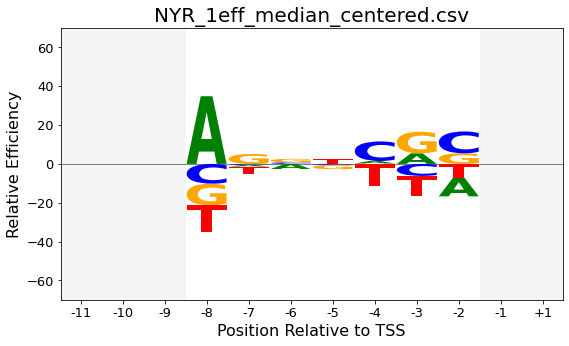

In [3]:
# input: (-11 to +1) x ('A','G','C','T')
# output: same width, containing positions from -11 to +1; hide some positions => shadow;

# which region to be shown
start = -8
end = -2 # if +1, put 0

pref_tmp = pref.iloc[:,:]
pref_tmp.iloc[:11+start,:] = 0
pref_tmp.iloc[11+end+1:,:] = 0

pos_label = ['-11','-10','-9','-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '+1'] #[(11+start-1):(11+end+1)]

fig, ax = plt.subplots(1,1, figsize=[9/12*len(pos_label),5])
logo = logomaker.Logo(pref_tmp.reset_index()[['A','G','C','T']], ax=ax)
logo.style_glyphs_below(flip=False,) # if fliping logo below baseline
ax.set_title(mtx_name, fontsize=20)
ax.set_ylabel(r'Relative Efficiency', fontsize=16)
ax.set_xlabel(r'Position Relative to TSS', fontsize=16)
ax.set_ylim(-70, 70)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks(range(0, len(pos_label)))
ax.set_xticklabels(pos_label, fontsize=13)

if start>-11: logo.highlight_position_range(pmin=0, pmax=11+start-1, color='whitesmoke')
logo.highlight_position_range(pmin=11+end+1, pmax=len(pos_label), color='whitesmoke')
plt.savefig((mtx_folder+mtx_name).replace(".csv","-f"+str(start)+"t"+str(end)+".pdf"))

### Sequence logos of sequence preference, showing interactions i.e. coupling between positions  
"Coupling" would entail a base at one position can determine the contribution or effect of a base at another psotion

In [4]:
# a table contains interaction parameters
itr_info = pd.DataFrame({'itr_idx':[1, 2],\
                         'itr_name':['-9under-8','-8under-9'],\
                         'itr_file':['n8itr','n9itr'],\
                         'loc1':[4*2, 4*3],\
                         'loc2':[4*3, 4*4],\
                         'pos_label':[['n8A', 'n8G', 'n8C', 'n8T'],['n9A', 'n9G', 'n9C', 'n9T']],\
                         'xlab':['-8', '-9'],\
                         'ylab':['-9', '-8']
                        }).set_index('itr_idx')
    # naming of 'itr_file', 'pos_label' is based on itrs master matrix of (-11 to +1)x(-11 to +1)
itr_info

,itr_name,itr_file,loc1,loc2,pos_label,xlab,ylab
itr_idx,,,,,,,
1,-9under-8,n8itr,8,12,"[n8A, n8G, n8C, n8T]",-8,-9
2,-8under-9,n9itr,12,16,"[n9A, n9G, n9C, n9T]",-9,-8


In [5]:
# Load interaction values, generated by <6-lib_fig.R>
mtx_folder = "/Users/xxxx/Documents/Txn/3-TSS_sequence_library/9-DTmerge_analysis/7-poolDs_cmbTs/6-ct4-itr_centered/WT/"
itr_idx = 2
mtx_name = 'WT-'+itr_info.loc[itr_idx, 'itr_file']+'-median-centered_pos.csv'

#pref = pd.read_csv(mtx_folder+mtx_name, index_col=0)
pref = pd.read_csv(mtx_folder+mtx_name, index_col=False)\
         .loc[itr_info.loc[itr_idx, 'loc1']:itr_info.loc[itr_idx, 'loc2']-1,].reset_index()\
         .loc[:,['A','G','C','T']].fillna(0)
pref

,A,G,C,T
0,13.083668,1.813426,-6.381257,-8.515838
1,22.351997,-5.287664,-7.460590,-9.603743
2,27.402213,-7.559025,-8.681120,-11.162068
3,26.735213,-5.156930,-8.264347,-13.313935


[Text(0, 0, 'n9A'), Text(1, 0, 'n9G'), Text(2, 0, 'n9C'), Text(3, 0, 'n9T')]

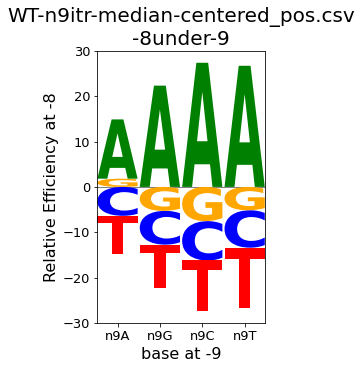

In [6]:
pos_label = itr_info.loc[itr_idx, 'pos_label']

fig, ax = plt.subplots(1,1, figsize=[9/12*len(pos_label),5])
logo = logomaker.Logo(pref, ax=ax)
logo.style_glyphs_below(flip=False,) # whether fliping logo below baseline
ax.set_title(mtx_name+'\n'+itr_info.loc[itr_idx, 'itr_name'], fontsize=20)
ax.set_ylabel('Relative Efficiency at '+itr_info.loc[itr_idx, 'ylab'], fontsize=16)
ax.set_xlabel('base at '+itr_info.loc[itr_idx, 'xlab'], fontsize=16)
ax.set_ylim(-30, 30)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks(range(0,pref.shape[0]))
ax.set_xticklabels(pos_label, fontsize=13)

plt.savefig((mtx_folder+mtx_name).replace(".csv","-"+itr_info.loc[itr_idx, 'itr_name']+".pdf"))